# Spotify 1 Million Tracks

### Descrição

This dataset was extracted from the Spotify platform using the Python library "Spotipy", which allows users to access music data provided via APIs. The dataset collected includes about 1 Million tracks with 19 features between 2000 and 2023. Also, there is a total of 61,445 unique artists and 82 genres in the data. Its significance lies in its potential to unravel patterns and predict song popularity prior to its release. 

### Os Dados

Features do Dataset

- **Popularity** - popularidade da música (0 a 100);
- **Year** - ano de lançamento (2000 até 2023);
- **Danceability** - se a música é adequada para dançar (0.0 a 1.0);
- **Energy** - a intensidade e atividade preceptiva da música (0.0 a 1.0);
- **Key** - a afinação da música (0 a 11);
- **Loudness** - intensidade da música em decibeis (-60 até 0 dB).
- **Mode** - o modo da música (0 ou 1);
- **Speechiness** - a presença das palavraas na música;
- **Acousticness** - se a música é acústica (0 a 1);
- **Instrumentalness** - se a música contém vocais (0 a 1);
- **Liveness** - presença de público na música (0 a 1);
- **Valence** - positividade da música (0 a 1).
- **Tempo** - o tempo da música em batimentos por minuto;
- **Time_signature** - assinatura do tempo de uma música (3 a 7).
- **Duration_ms** - duração em milissegundos.

### Importe das Bibliotecas

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Para visualizar os valores com cinco casas decimais
# pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Compreender os dados

In [67]:
data = pd.read_csv('dataset/spotify_data.csv')

In [68]:
data.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

In [70]:
data.describe()

,Unnamed: 0,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00
mean,659061.32,18.38,2011.96,0.54,0.64,5.29,-8.98,0.63,0.09,0.32,0.25,0.22,0.46,121.38,249561.78,3.89
std,428549.15,15.89,6.80,0.18,0.27,3.56,5.68,0.48,0.13,0.35,0.37,0.20,0.27,29.78,149426.16,0.47
min,0.00,0.00,2000.00,0.00,0.00,0.00,-58.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2073.00,0.00
25%,289940.75,5.00,2006.00,0.41,0.45,2.00,-10.83,0.00,0.04,0.01,0.00,0.10,0.23,98.80,181091.00,4.00
50%,579881.50,15.00,2012.00,0.55,0.69,5.00,-7.45,1.00,0.05,0.15,0.00,0.13,0.44,121.93,225744.00,4.00
75%,1031689.25,29.00,2018.00,0.68,0.87,8.00,-5.28,1.00,0.09,0.64,0.61,0.29,0.67,139.90,286913.50,4.00
max,1473395.00,100.00,2023.00,0.99,1.00,11.00,6.17,1.00,0.97,1.00,1.00,1.00,1.00,249.99,6000495.00,5.00


In [71]:
data.head()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.48,0.30,4,-10.06,1,0.04,0.69,0.00,0.12,0.14,133.41,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.57,0.45,3,-10.29,1,0.03,0.48,0.00,0.10,0.52,140.18,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.41,0.23,3,-13.71,1,0.03,0.34,0.00,0.09,0.14,139.83,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.39,0.25,10,-9.85,1,0.04,0.81,0.00,0.08,0.51,204.96,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.43,0.79,6,-5.42,0,0.03,0.07,0.02,0.11,0.22,171.86,244320,4


In [72]:
data.tail()

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
1159759,1473391,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.37,0.74,10,-6.45,0,0.07,0.33,0.00,0.16,0.52,107.95,344013,3
1159760,1473392,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.52,0.68,7,-7.59,0,0.03,0.79,0.00,0.13,0.26,119.90,285067,4
1159761,1473393,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.49,0.44,5,-8.51,1,0.03,0.48,0.00,0.09,0.04,100.08,214253,4
1159762,1473394,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.48,0.41,0,-13.34,1,0.03,0.43,0.00,0.12,0.20,133.88,239133,3
1159763,1473395,Mo' Horizons,Hit the Road Jack (Pé Na Éstrada),4oMiOwhDZEdBuzAfhzRHbi,3,2011,trip-hop,0.78,0.86,1,-7.29,0,0.12,0.22,0.00,0.06,0.86,89.99,212227,4


In [73]:
data['popularity'].describe().apply("{0:.2f}".format)

count    1159764.00
mean          18.38
std           15.89
min            0.00
25%            5.00
50%           15.00
75%           29.00
max          100.00
Name: popularity, dtype: object

### Preparação e transformação dos dados

Missing Values

<Axes: >

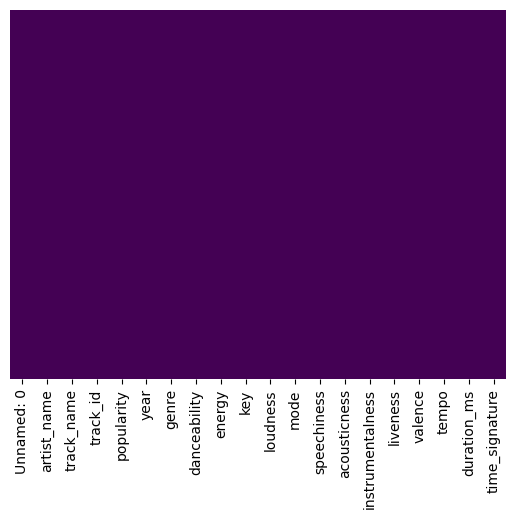

In [74]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [75]:
# Drop Id and Track Id columns
data.drop(['Unnamed: 0', 'track_id'], axis=1, inplace=True, errors='ignore')
data.head()

,artist_name,track_name,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,68,2012,acoustic,0.48,0.30,4,-10.06,1,0.04,0.69,0.00,0.12,0.14,133.41,240166,3
1,Jason Mraz,93 Million Miles,50,2012,acoustic,0.57,0.45,3,-10.29,1,0.03,0.48,0.00,0.10,0.52,140.18,216387,4
2,Joshua Hyslop,Do Not Let Me Go,57,2012,acoustic,0.41,0.23,3,-13.71,1,0.03,0.34,0.00,0.09,0.14,139.83,158960,4
3,Boyce Avenue,Fast Car,58,2012,acoustic,0.39,0.25,10,-9.85,1,0.04,0.81,0.00,0.08,0.51,204.96,304293,4
4,Andrew Belle,Sky's Still Blue,54,2012,acoustic,0.43,0.79,6,-5.42,0,0.03,0.07,0.02,0.11,0.22,171.86,244320,4


### Analisar os dados

In [76]:
data['popularity'].value_counts()

popularity
0      158391
1       39820
2       31247
8       30322
9       29249
        ...  
93          3
94          1
96          1
100         1
95          1
Name: count, Length: 98, dtype: int64

<Axes: >

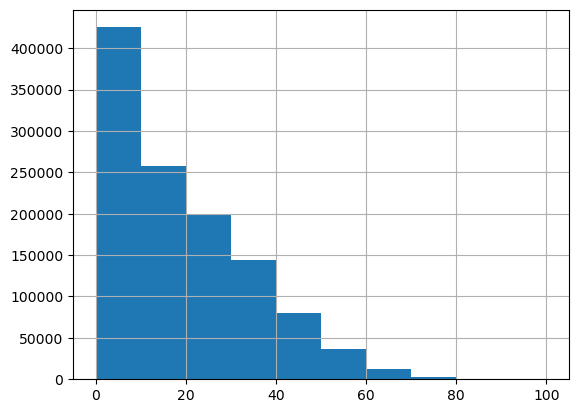

In [77]:
data['popularity'].hist()

In [78]:
data['artist_name'].value_counts()

artist_name
Traditional              4058
Grateful Dead            2320
Johann Sebastian Bach    2125
Giacomo Meyerbeer        1345
Elvis Presley            1242
                         ... 
Gaia Consort                1
Dzej Ramadanovski           1
Goca Trzan                  1
Robbie O'Connell            1
Sleep Therapist             1
Name: count, Length: 64158, dtype: int64

In [79]:
data.groupby(by=['artist_name']).mean(numeric_only=True)

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist_name,,,,,,,,,,,,,,,
!!!,21.80,2010.00,0.76,0.79,5.57,-6.83,0.57,0.07,0.06,0.28,0.16,0.64,118.58,291111.80,4.00
!T.O.O.H.!,1.60,2009.00,0.34,0.99,5.80,-2.18,0.60,0.22,0.00,0.04,0.21,0.12,124.96,220553.40,3.90
"""14""",0.00,2011.50,0.52,0.53,5.00,-8.43,1.00,0.03,0.48,0.00,0.17,0.59,121.66,156256.75,4.00
"""DEMONS""",0.27,2001.70,0.22,0.96,5.64,-4.41,0.82,0.08,0.00,0.19,0.19,0.42,131.76,164122.85,4.00
"""Weird Al"" Yankovic",31.48,2009.76,0.60,0.54,4.92,-9.86,0.88,0.10,0.31,0.00,0.18,0.68,134.40,270396.72,3.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
조장혁,6.75,2004.75,0.46,0.46,4.00,-5.94,1.00,0.03,0.36,0.00,0.33,0.15,98.40,251851.50,4.00
조정현,16.50,2003.00,0.47,0.43,7.00,-6.16,1.00,0.03,0.36,0.00,0.10,0.13,72.97,256653.00,4.00
채연,12.89,2004.67,0.77,0.73,4.33,-6.37,0.56,0.07,0.07,0.00,0.29,0.75,125.97,215371.78,4.00


In [80]:
data.groupby(by=['year']).mean(numeric_only=True)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
year,,,,,,,,,,,,,,
2000,10.74,0.53,0.60,5.29,-10.15,0.66,0.08,0.36,0.24,0.22,0.51,119.85,259887.55,3.88
2001,11.25,0.52,0.60,5.30,-10.10,0.66,0.09,0.36,0.25,0.22,0.49,119.12,261913.33,3.87
2002,11.68,0.53,0.62,5.31,-9.59,0.65,0.09,0.34,0.24,0.22,0.50,119.80,263335.52,3.89
2003,12.44,0.53,0.63,5.28,-9.38,0.66,0.09,0.34,0.24,0.22,0.49,120.11,258998.81,3.88
2004,12.30,0.53,0.64,5.30,-9.11,0.65,0.09,0.33,0.23,0.23,0.49,120.45,258381.27,3.89
2005,13.42,0.53,0.63,5.32,-9.27,0.65,0.09,0.33,0.24,0.23,0.49,120.74,261665.49,3.88
2006,13.14,0.53,0.63,5.32,-9.14,0.65,0.09,0.33,0.25,0.22,0.49,120.95,263190.08,3.88
2007,13.47,0.53,0.64,5.32,-9.03,0.64,0.09,0.32,0.25,0.23,0.48,121.06,264918.81,3.89
2008,13.46,0.53,0.65,5.30,-8.76,0.65,0.09,0.31,0.26,0.23,0.48,122.40,263923.32,3.89


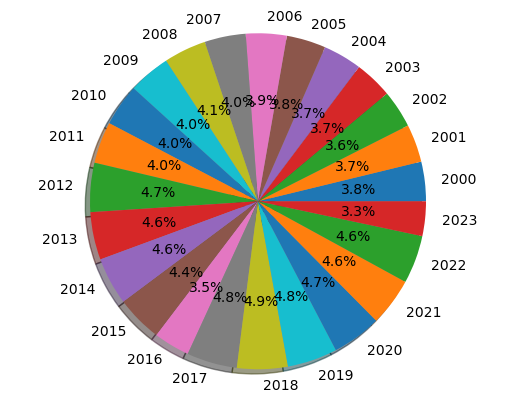

In [84]:
labels = data['year'].astype('category').cat.categories.tolist()
counts = data['year'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [91]:
data.groupby(by=['genre']).mean(numeric_only=True)

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
genre,,,,,,,,,,,,,,,
acoustic,17.83,2011.76,0.54,0.43,5.14,-10.44,0.79,0.05,0.57,0.15,0.18,0.43,118.45,217923.42,3.86
afrobeat,8.56,2014.40,0.65,0.69,5.43,-8.12,0.55,0.09,0.27,0.27,0.18,0.70,119.09,273569.01,3.92
alt-rock,38.60,2011.49,0.50,0.74,5.28,-6.22,0.69,0.06,0.14,0.08,0.21,0.45,126.24,235992.12,3.93
ambient,20.01,2011.34,0.33,0.26,5.05,-19.24,0.60,0.05,0.73,0.77,0.15,0.16,107.84,298580.40,3.71
black-metal,11.09,2011.68,0.26,0.83,5.31,-7.05,0.57,0.09,0.06,0.55,0.25,0.15,125.09,331891.86,3.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swedish,19.93,2011.42,0.54,0.66,5.29,-8.24,0.63,0.10,0.27,0.14,0.21,0.48,122.03,228464.05,3.90
tango,2.52,2011.30,0.55,0.32,5.19,-10.97,0.54,0.08,0.89,0.25,0.21,0.57,116.25,184624.22,3.83
techno,14.70,2011.98,0.66,0.78,5.62,-8.51,0.55,0.08,0.07,0.63,0.18,0.36,132.39,335865.15,3.95


In [81]:
# muito demorado
# sns.pairplot(data, hue='popularity')

<Axes: >

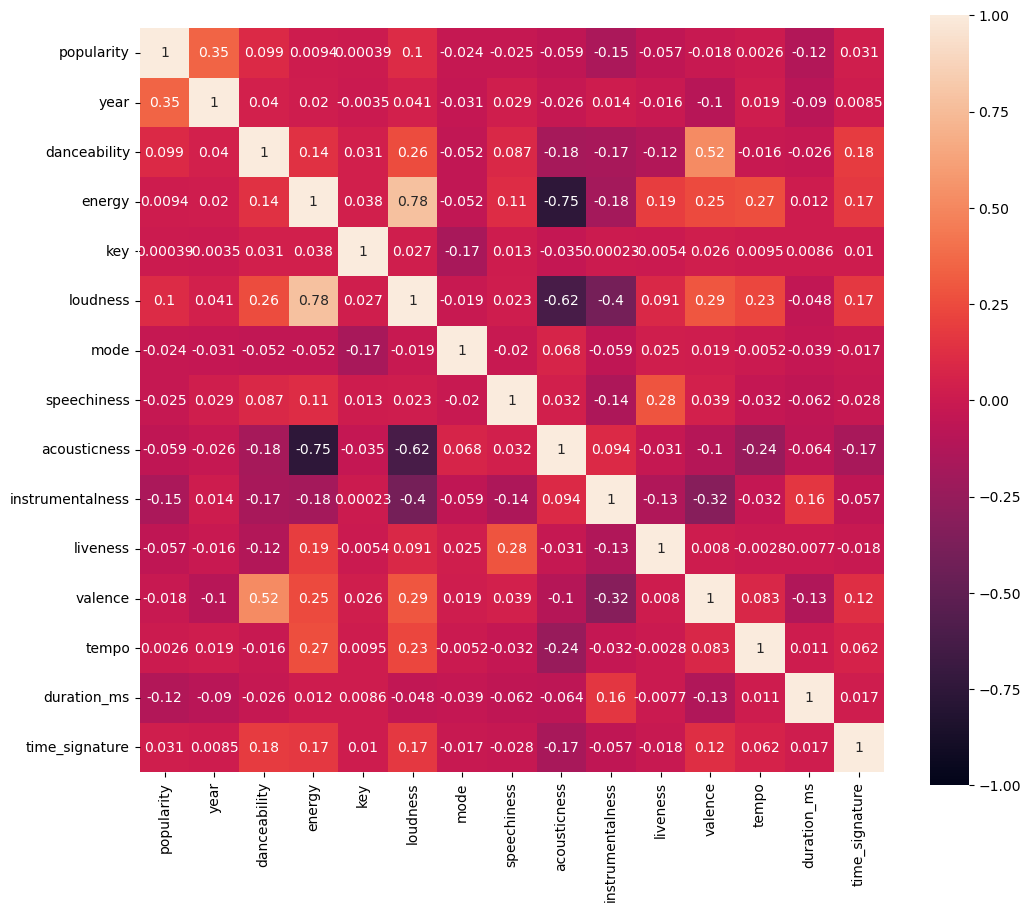

In [82]:
corr_matrix = data.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)